# Mental Health Awareness in IT Workplace
***
** We are going to look at data.
** In this way, we could get result of mental health illness percentage in IT tech people.
***

# Data Preprocessing

### 1. import what we need

In [1]:
import numpy as np # linear algebra
import pandas as pd # for pd.read_csv
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier

In [2]:
def data_select():
    
    # select dataset and going to clean, save, analysis them
    File_1 = 'survey_2017_new.csv'
    File_2 = 'survey_2016.csv' # not yet
    
    # read raw data from csv file
    train_raw = pd.read_csv('survey_2017_new.csv')

    # # Pandas: whats the data row count?
    print("---------------------------------------------------")
    print("----------------Data Shape-------------------------")
    print("---------------------------------------------------")
    print(train_raw.shape)

    # # Pandas: whats the distribution of the data?(it shows only string features')
    print("---------------------------------------------------")
    print("----------------Data distribution------------------")
    print("---------------------------------------------------")
    print(train_raw.describe())

    # # Pandas: What types of data do i have?(it shows how many data of each feature)
    print("---------------------------------------------------")
    print("----------------Data Type--------------------------")
    print("---------------------------------------------------")
    print(train_raw.info())
    
    return train_raw

In [3]:
# read csv data file
train_df = data_select()

---------------------------------------------------
----------------Data Shape-------------------------
---------------------------------------------------
(756, 27)
---------------------------------------------------
----------------Data distribution------------------
---------------------------------------------------
              Age  self_employed   treatment  tech_company
count  755.000000     755.000000  756.000000    644.000000
mean    34.965563       0.148344    0.603175      0.779503
std      8.355426       0.355677    0.489563      0.414904
min     18.000000       0.000000    0.000000      0.000000
25%     29.000000       0.000000    0.000000      1.000000
50%     34.000000       0.000000    1.000000      1.000000
75%     40.000000       0.000000    1.000000      1.000000
max     67.000000       1.000000    1.000000      1.000000
---------------------------------------------------
----------------Data Type--------------------------
-------------------------------------------

In [4]:
# from data type, now you know what'll be not used.
# so you could remove the unnecessary variables
train_df = train_df.drop(['comments'], axis= 1) 
train_df = train_df.drop(['state'], axis= 1) 
train_df = train_df.drop(['Timestamp'], axis= 1)

In [5]:
#checking that there's no missing data missing
train_df.isnull().sum().max() 
print("---------------------------------------------------")
print("----------------Data Columns-----------------------")
print("---------------------------------------------------")
print(train_df.columns)
print("---------------------------------------------------")
print("----------------Data Example(first 5 rows)---------")
print("---------------------------------------------------")
print(train_df.head(5)) # print 5 datas in row for checking

---------------------------------------------------
----------------Data Columns-----------------------
---------------------------------------------------
Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_of_employee', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')
---------------------------------------------------
----------------Data Example(first 5 rows)---------
---------------------------------------------------
    Age  Gender        Country  self_employed family_history  treatment  \
0  27.0  Female  United Kingdo            0.0             No          1   
1  31.0    male  United Kingdo            0.0             No    

In [6]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'N/A'
defaultFloat = 0.0
# Create lists by data type
intFeatures = ['Age', 'treatment', 'tech_company']
stringFeatures = ['Gender', 'Country','state', 'self_employed', 'family_history', 'work_interfere',
                 'no_of_employee', 'remote_work','anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help', 'Timestamp', 'comments']
floatFeatures = []


In [7]:
print("---------------------------------------------------")
print("----------------who are intFeatures?---------------")
print("---------------------------------------------------")
print("They are : ", intFeatures)

---------------------------------------------------
----------------who are intFeatures?---------------
---------------------------------------------------
They are :  ['Age', 'treatment', 'tech_company']


In [8]:
floatFeatures = []

for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
#print(train_df.head(5))

In [9]:
#clean 'Gender'
#Slower case all columm's elements
gender = train_df['Gender'].str.lower()

#Select unique elements
gender = train_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "man", "mal", "male (cis)", "make", "male ", "man", "msle", "mail", "malr","cis man", "cis male", "male/androgynous ", "cis hetero male",
            "male (hey this is the tech industry you're talking about)", "God King of the Valajar", "Cis male", "Cis-male", "male-ish", "male, cis", "dude", "cis-male", "Cis-male", "cis male "]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "genderfluid", "uhhhhhhhhh fem genderqueer?", "n/a",
             "nonbinary", "Transfeminine", "trans woman", "\-", "non binary", "contextual", "sometimes", "agender/genderfluid", "none", "Genderqueer demigirl", "Genderqueer/non-binary", "Transfeminine"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail", "femalw", "my sex is female.", "female-ish", "f, cisgender",
              "cis-female", "woman-identified", "female (cis)", "female (cisgender)", "Female (cis) "]

for (row, col) in train_df.iterrows():
    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]
print(train_df['Gender'].unique())


['female' 'male' 'trans']


In [10]:
#complete missing age with mean'
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s
#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [11]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
# 0 is not self_employed, 1 is self_employed
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 0.0)
print(train_df['self_employed'].unique())


[0. 1.]


In [12]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Some' 'Not ' 'Ofte' 'Rare' 'Neve']


In [13]:
# Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] = labelValue

for key, value in labelDict.items():
    print(key, value)
print(train_df.head())

# missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

label_Age [18.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 64.0, 66.0, 67.0]
label_Gender ['female', 'male', 'trans']
label_Country ['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Croatia', 'Czech Republi', 'Eritrea', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Latvia', 'Luxembourg', 'Mexico', 'N/A', 'Netherlands', 'New Zealand', 'Pakistan', 'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia', 'Singapore', 'Slovakia', 'South Africa', 'Spain', 'Swaziland', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdo', 'United States']
label_self_employed [0.0, 1.0]
label_family_history ["I don't know", 'No', 'Yes']
label_treatment [0, 1]

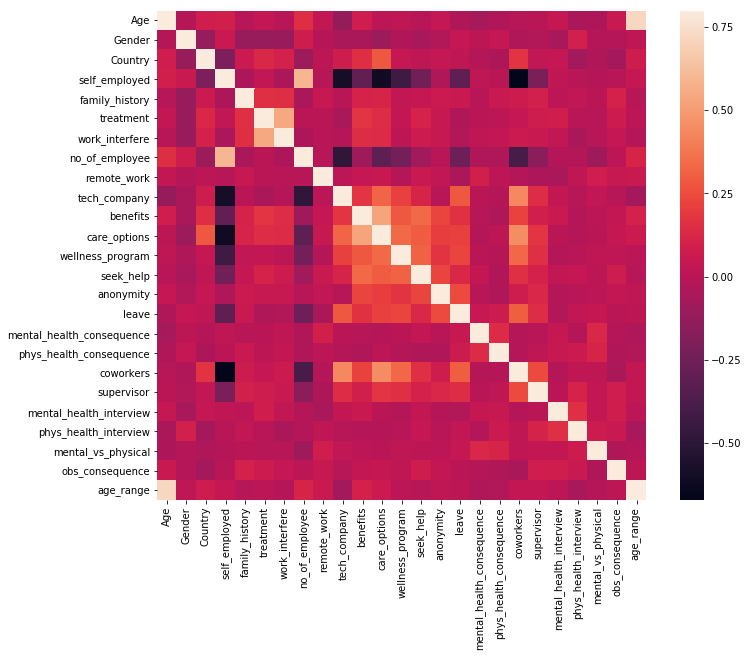

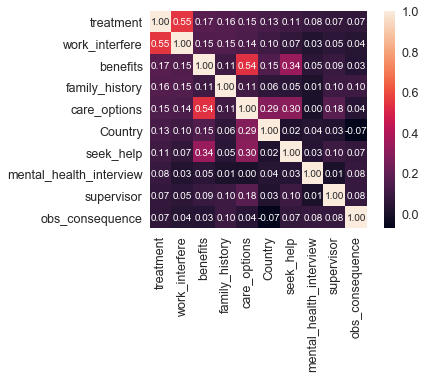

In [14]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/Users/jinpeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jinpeng/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


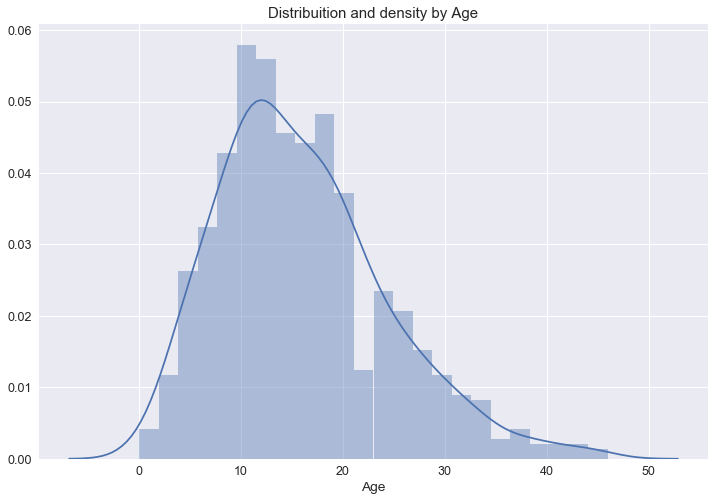

In [15]:
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

Text(0.5,1,'Total Distribuition by treated or not')

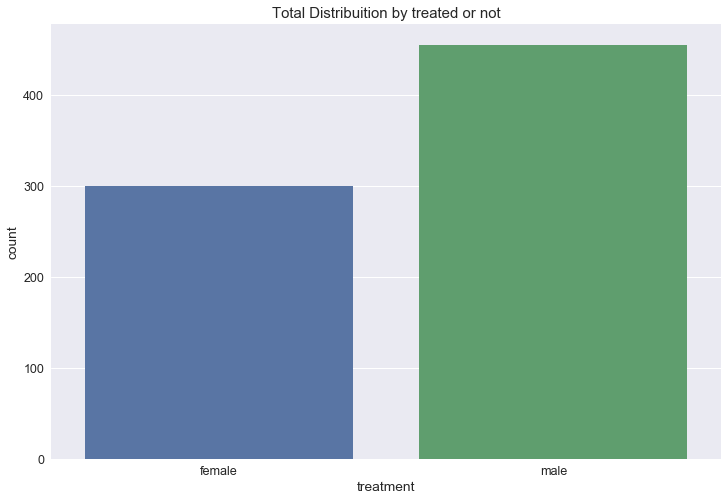

In [16]:
# Let see how many people has been treated
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=train_df)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not')

/Users/jinpeng/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jinpeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jinpeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


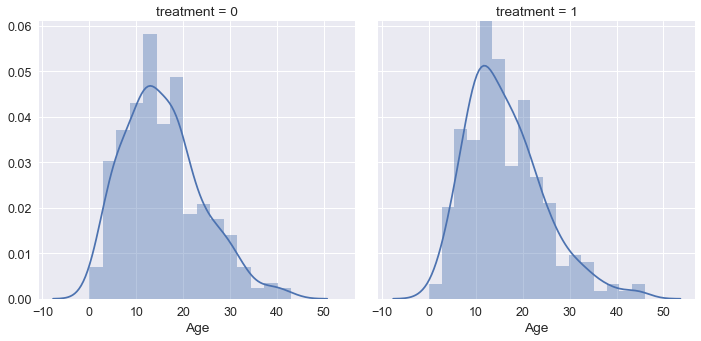

In [17]:
# Relation between age and mental health disorder
#treatmet = 0(no), 1(yes)
g = sns.FacetGrid(train_df, col='treatment', size=5)
g = g.map(sns.distplot, "Age")
plt.show()

/Users/jinpeng/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jinpeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jinpeng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


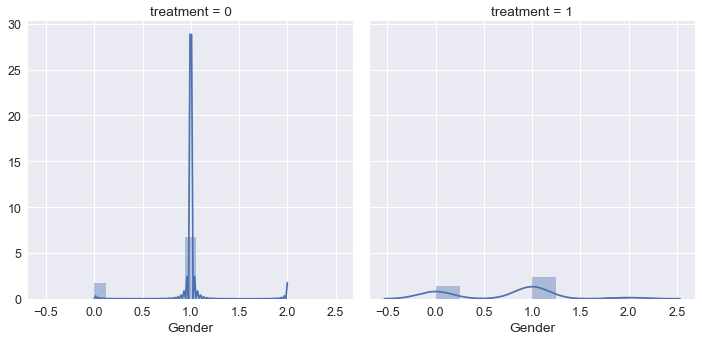

In [18]:
#Relation between gender and mental health disorder
g = sns.FacetGrid(train_df, col='treatment', size=5)
g = g.map(sns.distplot, 'Gender')
plt.show()

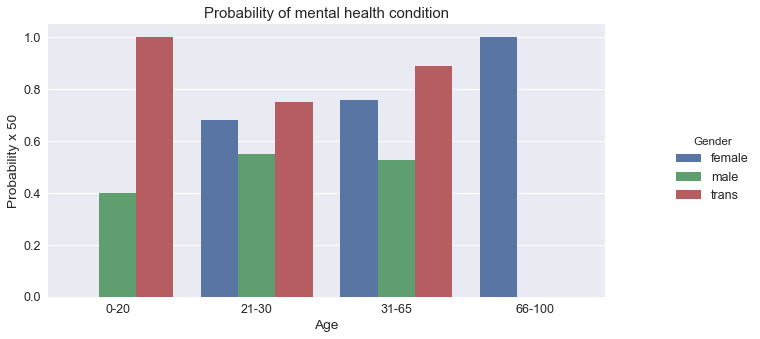

In [19]:

# Relation between age and mental health disorder
o = labelDict['label_age_range']
g = sns.factorplot(x="age_range", y='treatment', hue="Gender", data=train_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 50')
plt.xlabel('Age')
# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

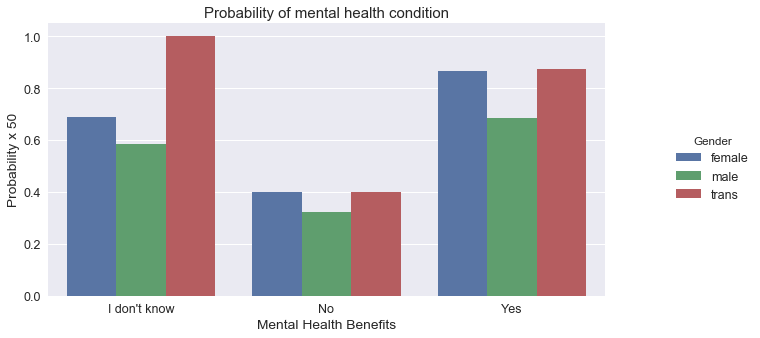

In [20]:
o = labelDict['label_family_history']
g = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 50')
plt.xlabel('Mental Health Benefits')
# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

In [21]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
pd.set_option('display.max_columns', None)
print(train_df.head())

        Age  Gender  Country  self_employed  family_history  treatment  \
0  0.173913       0       45              0               1          1   
1  0.260870       1       45              0               1          0   
2  0.369565       1       46              0               2          1   
3  0.065217       1       46              0               0          1   
4  0.717391       0       46              1               2          1   

   work_interfere  no_of_employee  remote_work  tech_company  benefits  \
0               4               0            1             1         2   
1               1               0            1             1         3   
2               4               1            1             1         0   
3               4               5            1             1         3   
4               2               6            2             0         1   

   care_options  wellness_program  seek_help  anonymity  leave  \
0             2                 2          0

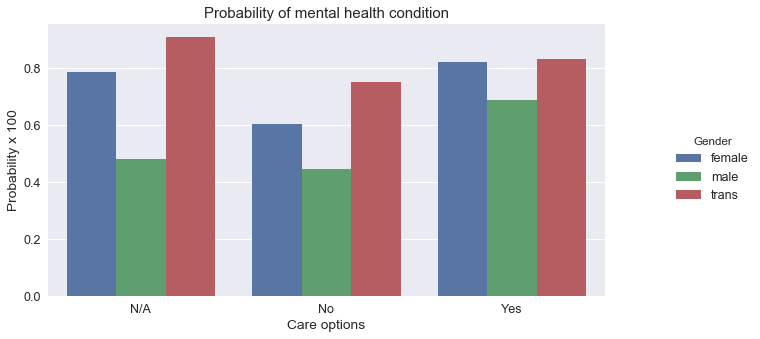

In [22]:
o = labelDict['label_care_options']
g = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

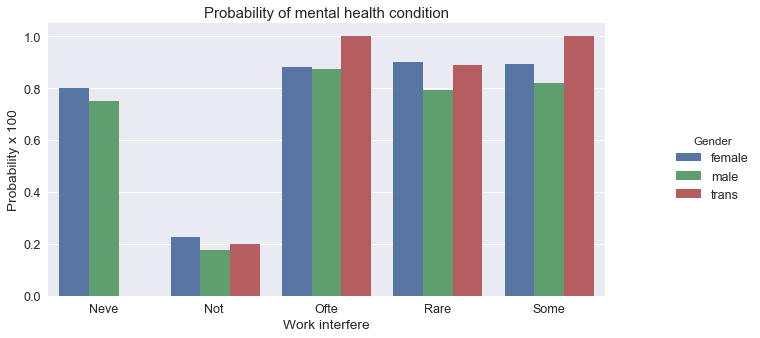

In [23]:
o = labelDict['label_work_interfere']
g = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

In [24]:
# define X and y
# feature_cols = ['Age', 'Gender', 'family_history', 'work_interfere',
#                  'no_of_employee', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
#                  'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
#                  'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
#                  'seek_help']
feature_cols = ['work_interfere',
                 'no_of_employee', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
X = train_df[feature_cols]
y = train_df['treatment']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

print(X_train.shape)
print(X_test.shape)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

(453, 16)
(303, 16)


In [25]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

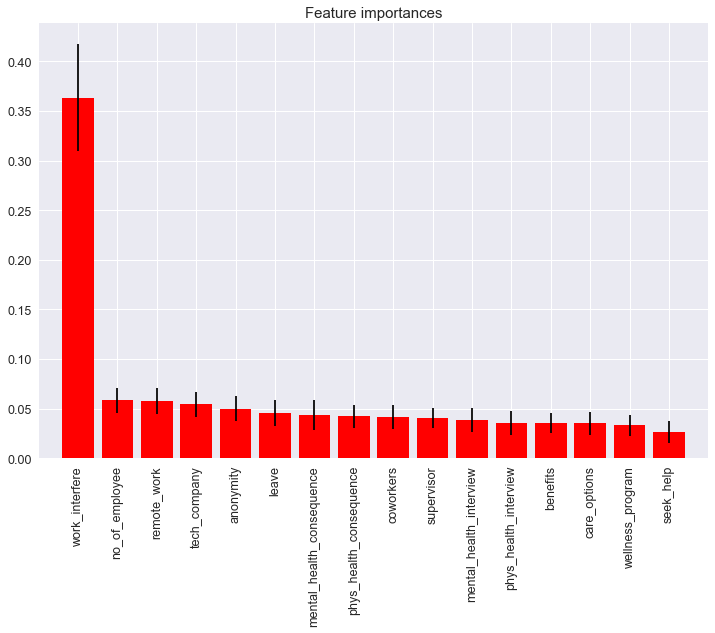

In [26]:
# Plot the feature 3
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [27]:
##7. Tuning
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

In [28]:
##########################################
# Tuning with cross validation score
##########################################
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [29]:
##Tuning with GridSearchCV

def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [30]:
##Tuning with RandomizedSearchCV
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.grid_scores_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [31]:
## Tuning with searching multiple parameters simultaneously

def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.grid_scores_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

In [32]:
## 8. Evaluating models
## Logistic Regression

def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

########### Logistic Regression ###############
Accuracy: 0.7920792079207921
Null accuracy:
 1    189
0    114
Name: treatment, dtype: int64
Percentage of ones: 0.6237623762376238
Percentage of zeros: 0.37623762376237624
True: [1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0]
Pred: [1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1]


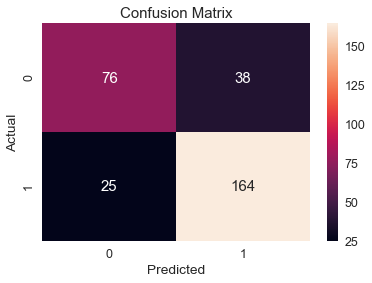

Classification Accuracy: 0.7920792079207921
Classification Error: 0.20792079207920788
False Positive Rate: 0.3333333333333333
Precision: 0.8118811881188119
AUC Score: 0.7671957671957672
Cross-validated AUC: 0.8095628019323673
First 10 predicted responses:
 [1 1 1 1 1 0 1 1 1 1]
First 10 predicted probabilities of class members:
 [[0.17491848 0.82508152]
 [0.06801483 0.93198517]
 [0.16710086 0.83289914]
 [0.18712922 0.81287078]
 [0.240595   0.759405  ]
 [0.60647379 0.39352621]
 [0.07834326 0.92165674]
 [0.1011168  0.8988832 ]
 [0.07377863 0.92622137]
 [0.13924243 0.86075757]]
First 10 predicted probabilities:
 [[0.82508152]
 [0.93198517]
 [0.83289914]
 [0.81287078]
 [0.759405  ]
 [0.39352621]
 [0.92165674]
 [0.8988832 ]
 [0.92622137]
 [0.86075757]]


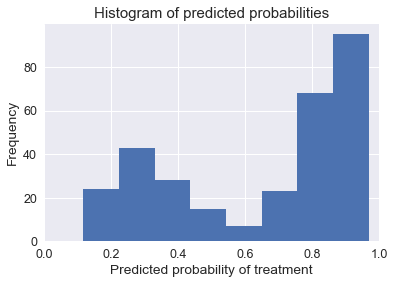

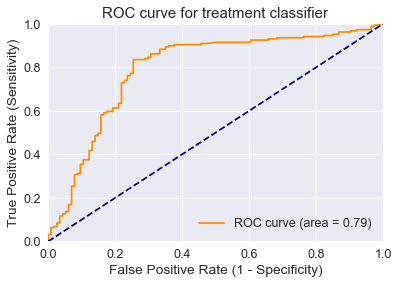

[[ 76  38]
 [ 25 164]]


In [33]:
logisticRegression()

In [34]:
## KNeighbors Classifier
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # From https://github.com/justmarkham/scikit-learn-videos/blob/master/08_grid_search.ipynb
    #tuningCV(knn)
    #tuningGridSerach(knn)
    #tuningMultParam(knn)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['KNN'] = accuracy_score * 100

/Users/jinpeng/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Rand. Best Score:  0.7804232804232805
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 27}
[0.775, 0.78, 0.77, 0.774, 0.776, 0.772, 0.775, 0.779, 0.779, 0.78, 0.78, 0.779, 0.776, 0.78, 0.779, 0.779, 0.779, 0.771, 0.779, 0.78]
########### KNeighborsClassifier ###############
Accuracy: 0.7524752475247525
Null accuracy:
 1    189
0    114
Name: treatment, dtype: int64
Percentage of ones: 0.6237623762376238
Percentage of zeros: 0.37623762376237624
True: [1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0]
Pred: [1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1]


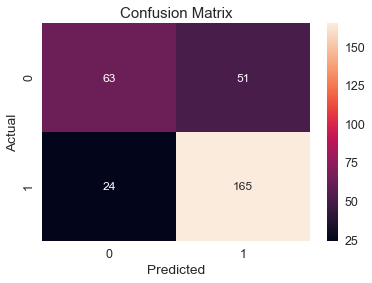

Classification Accuracy: 0.7524752475247525
Classification Error: 0.24752475247524752
False Positive Rate: 0.4473684210526316
Precision: 0.7638888888888888
AUC Score: 0.7128237259816207
Cross-validated AUC: 0.8154235104669887
First 10 predicted responses:
 [1 1 1 1 1 0 1 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [0.14814815 0.85185185]
 [0.14814815 0.85185185]
 [0.18518519 0.81481481]
 [0.48148148 0.51851852]
 [0.62962963 0.37037037]
 [0.22222222 0.77777778]
 [0.18518519 0.81481481]
 [0.07407407 0.92592593]
 [0.22222222 0.77777778]]
First 10 predicted probabilities:
 [[0.66666667]
 [0.85185185]
 [0.85185185]
 [0.81481481]
 [0.51851852]
 [0.37037037]
 [0.77777778]
 [0.81481481]
 [0.92592593]
 [0.77777778]]


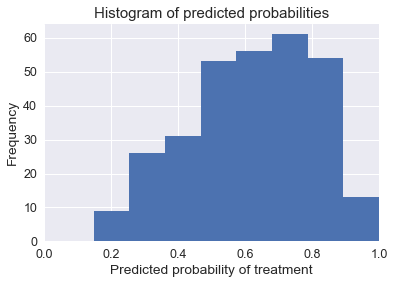

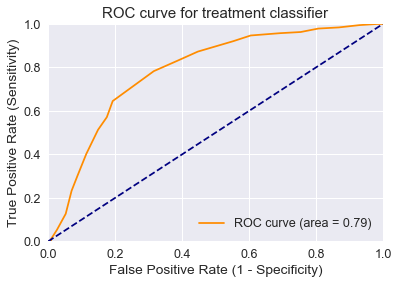

[[ 63  51]
 [ 24 165]]


In [35]:
Knn()

In [36]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100

/Users/jinpeng/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Rand. Best Score:  0.8253968253968254
Rand. Best Params:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}
[0.78, 0.825, 0.819, 0.828, 0.823, 0.825, 0.819, 0.823, 0.823, 0.829, 0.825, 0.823, 0.827, 0.821, 0.8, 0.788, 0.816, 0.819, 0.828, 0.792]
########### Tree classifier ###############
Accuracy: 0.5973597359735974
Null accuracy:
 1    189
0    114
Name: treatment, dtype: int64
Percentage of ones: 0.6237623762376238
Percentage of zeros: 0.37623762376237624
True: [1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0]
Pred: [1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1]


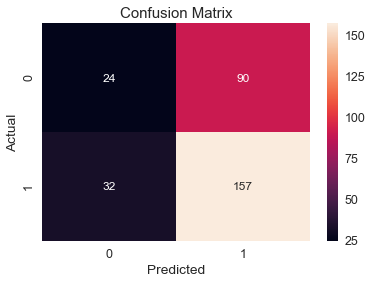

Classification Accuracy: 0.5973597359735974
Classification Error: 0.40264026402640263
False Positive Rate: 0.7894736842105263
Precision: 0.6356275303643725
AUC Score: 0.5206070732386522
Cross-validated AUC: 0.8122334943639291
First 10 predicted responses:
 [1 1 1 1 0 0 1 1 1 1]
First 10 predicted probabilities of class members:
 [[0.17307692 0.82692308]
 [0.25490196 0.74509804]
 [0.25490196 0.74509804]
 [0.25490196 0.74509804]
 [0.54347826 0.45652174]
 [0.66666667 0.33333333]
 [0.17307692 0.82692308]
 [0.17307692 0.82692308]
 [0.47126437 0.52873563]
 [0.17307692 0.82692308]]
First 10 predicted probabilities:
 [[0.82692308]
 [0.74509804]
 [0.74509804]
 [0.74509804]
 [0.45652174]
 [0.33333333]
 [0.82692308]
 [0.82692308]
 [0.52873563]
 [0.82692308]]


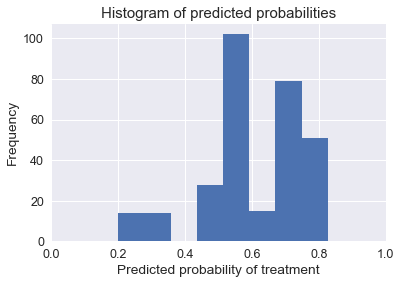

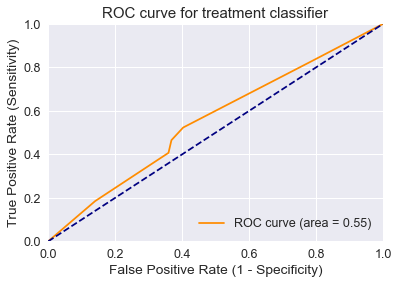

[[ 24  90]
 [ 32 157]]


In [37]:
treeClassifier()

In [38]:
##Random Forests
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    print('########### Random Forests ###############')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100



/Users/jinpeng/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Rand. Best Score:  0.8346560846560847
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 14, 'min_samples_leaf': 7, 'min_samples_split': 8}
[0.835, 0.827, 0.835, 0.833, 0.833, 0.833, 0.835, 0.835, 0.831, 0.835, 0.835, 0.835, 0.835, 0.832, 0.831, 0.831, 0.835, 0.832, 0.832, 0.833]
########### Random Forests ###############
Accuracy: 0.8217821782178217
Null accuracy:
 1    189
0    114
Name: treatment, dtype: int64
Percentage of ones: 0.6237623762376238
Percentage of zeros: 0.37623762376237624
True: [1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0]
Pred: [1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1]


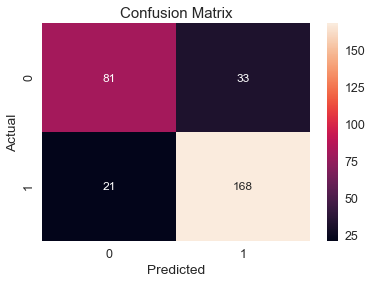

Classification Accuracy: 0.8217821782178217
Classification Error: 0.17821782178217827
False Positive Rate: 0.2894736842105263
Precision: 0.835820895522388
AUC Score: 0.7997076023391813
Cross-validated AUC: 0.8505289855072464
First 10 predicted responses:
 [1 1 1 1 1 0 1 1 1 1]
First 10 predicted probabilities of class members:
 [[0.1305964  0.8694036 ]
 [0.08394133 0.91605867]
 [0.14447756 0.85552244]
 [0.10408782 0.89591218]
 [0.33752793 0.66247207]
 [0.69896208 0.30103792]
 [0.17346745 0.82653255]
 [0.14429784 0.85570216]
 [0.19948137 0.80051863]
 [0.25001818 0.74998182]]
First 10 predicted probabilities:
 [[0.8694036 ]
 [0.91605867]
 [0.85552244]
 [0.89591218]
 [0.66247207]
 [0.30103792]
 [0.82653255]
 [0.85570216]
 [0.80051863]
 [0.74998182]]


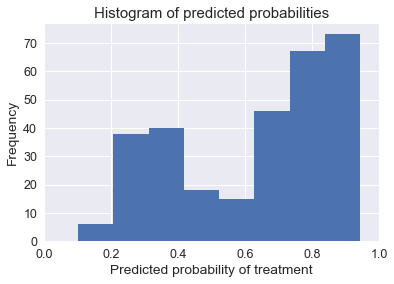

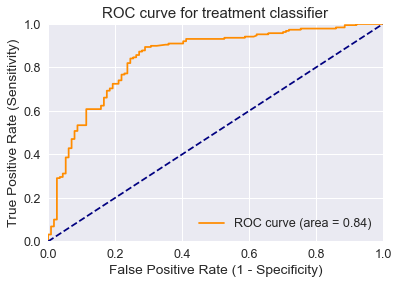

[[ 81  33]
 [ 21 168]]


In [39]:
randomForest()

In [40]:
#Bagging

def bagging():
    # Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    print('########### Bagging ###############')
    
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Bagging'] = accuracy_score * 100

########### Bagging ###############
Accuracy: 0.7821782178217822
Null accuracy:
 1    189
0    114
Name: treatment, dtype: int64
Percentage of ones: 0.6237623762376238
Percentage of zeros: 0.37623762376237624
True: [1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0]
Pred: [1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1]


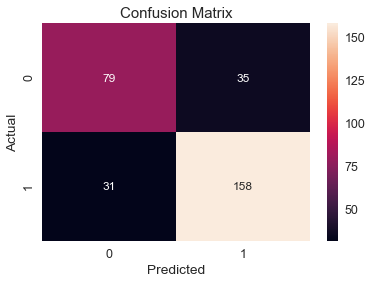

Classification Accuracy: 0.7821782178217822
Classification Error: 0.2178217821782178
False Positive Rate: 0.30701754385964913
Precision: 0.8186528497409327
AUC Score: 0.7644806460595933
Cross-validated AUC: 0.8301119162640902
First 10 predicted responses:
 [1 1 1 1 1 0 1 0 1 1]
First 10 predicted probabilities of class members:
 [[0.  1. ]
 [0.  1. ]
 [0.2 0.8]
 [0.1 0.9]
 [0.2 0.8]
 [0.9 0.1]
 [0.  1. ]
 [0.5 0.5]
 [0.1 0.9]
 [0.1 0.9]]
First 10 predicted probabilities:
 [[1. ]
 [1. ]
 [0.8]
 [0.9]
 [0.8]
 [0.1]
 [1. ]
 [0.5]
 [0.9]
 [0.9]]


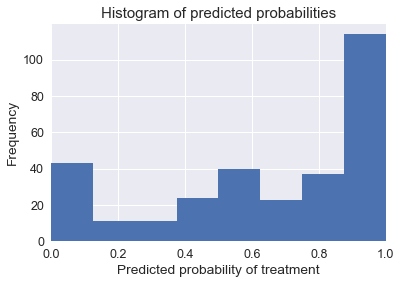

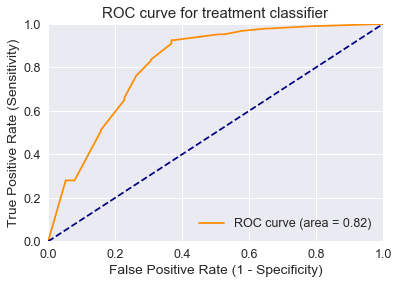

[[ 79  35]
 [ 31 158]]


In [41]:
bagging()

In [42]:
# Boosting

def boosting():
    # Building and fitting 
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    print('########### Boosting ###############')
    
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

########### Boosting ###############
Accuracy: 0.8184818481848185
Null accuracy:
 1    189
0    114
Name: treatment, dtype: int64
Percentage of ones: 0.6237623762376238
Percentage of zeros: 0.37623762376237624
True: [1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0]
Pred: [1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1]


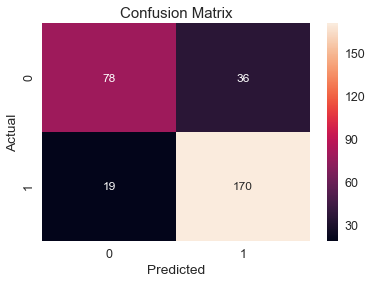

Classification Accuracy: 0.8184818481848185
Classification Error: 0.1815181518151815
False Positive Rate: 0.3157894736842105
Precision: 0.8252427184466019
AUC Score: 0.7918407128933445
Cross-validated AUC: 0.8419814814814813
First 10 predicted responses:
 [1 1 1 1 1 0 1 1 1 1]
First 10 predicted probabilities of class members:
 [[0.49875283 0.50124717]
 [0.49926221 0.50073779]
 [0.49865217 0.50134783]
 [0.49853218 0.50146782]
 [0.4995694  0.5004306 ]
 [0.50067821 0.49932179]
 [0.49914514 0.50085486]
 [0.49845345 0.50154655]
 [0.4997225  0.5002775 ]
 [0.49904815 0.50095185]]
First 10 predicted probabilities:
 [[0.50124717]
 [0.50073779]
 [0.50134783]
 [0.50146782]
 [0.5004306 ]
 [0.49932179]
 [0.50085486]
 [0.50154655]
 [0.5002775 ]
 [0.50095185]]


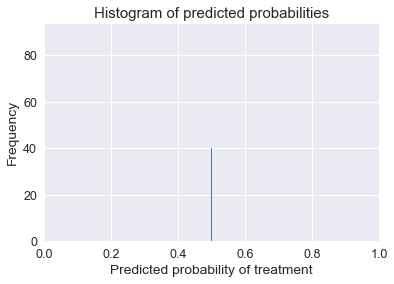

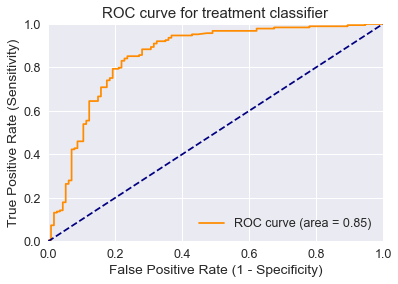

[[ 78  36]
 [ 19 170]]


In [43]:
boosting()

In [44]:
# Stacking

def stacking():
    # Building and fitting 
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = stack.predict(X_test)
    
    print('########### Stacking ###############')
    
    accuracy_score = evalClassModel(stack, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Stacking'] = accuracy_score * 100
    print(methodDict)

########### Stacking ###############
Accuracy: 0.7425742574257426
Null accuracy:
 1    189
0    114
Name: treatment, dtype: int64
Percentage of ones: 0.6237623762376238
Percentage of zeros: 0.37623762376237624
True: [1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0]
Pred: [1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1]


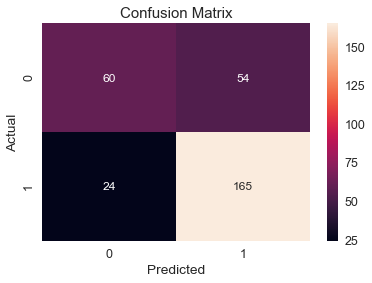

Classification Accuracy: 0.7425742574257426
Classification Error: 0.25742574257425743
False Positive Rate: 0.47368421052631576
Precision: 0.7534246575342466
AUC Score: 0.6996658312447787
Cross-validated AUC: 0.772256843800322
First 10 predicted responses:
 [1 1 1 1 1 0 1 1 1 1]
First 10 predicted probabilities of class members:
 [[0.01497775 0.98502225]
 [0.01497775 0.98502225]
 [0.01497775 0.98502225]
 [0.01497775 0.98502225]
 [0.01497775 0.98502225]
 [0.96526726 0.03473274]
 [0.01497775 0.98502225]
 [0.01497775 0.98502225]
 [0.01497775 0.98502225]
 [0.01497775 0.98502225]]
First 10 predicted probabilities:
 [[0.98502225]
 [0.98502225]
 [0.98502225]
 [0.98502225]
 [0.98502225]
 [0.03473274]
 [0.98502225]
 [0.98502225]
 [0.98502225]
 [0.98502225]]


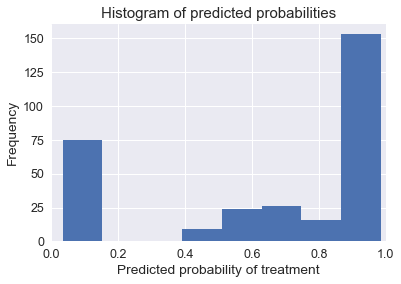

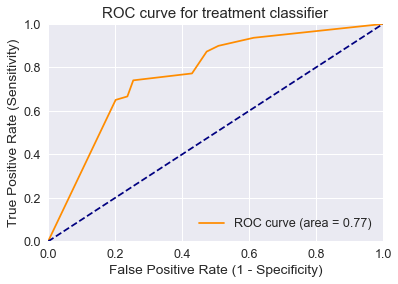

[[ 60  54]
 [ 24 165]]
{'Log. Regres.': 79.20792079207921, 'KNN': 75.24752475247524, 'Tree clas.': 59.73597359735974, 'R. Forest': 82.17821782178217, 'Bagging': 78.21782178217822, 'Boosting': 81.84818481848185, 'Stacking': 74.25742574257426}


In [45]:
stacking()

## Success method plot

In [46]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([60.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

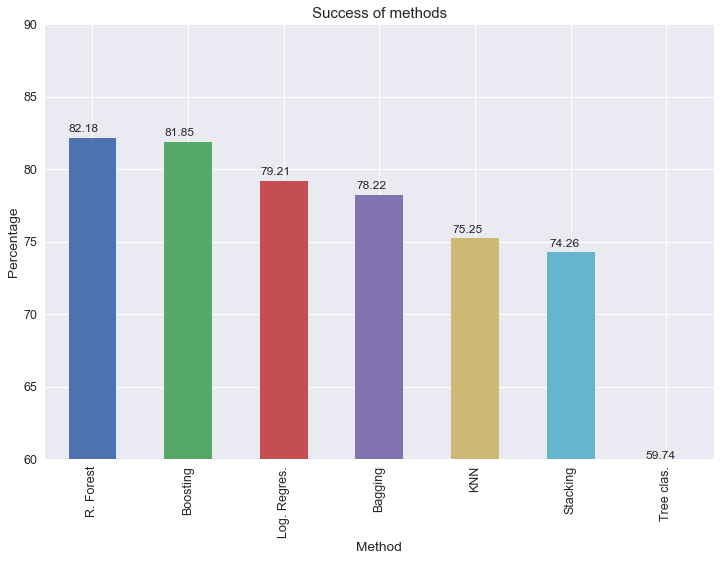

In [47]:
plotSuccess()

## Prediction

In [48]:
# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('submission.csv', index=False)

NameError: name 'dfTestPredictions' is not defined

In [ ]:
import tensorflow as tf
import argparse


batch_size = 10
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

In [ ]:
# Define Tensorflow feature columns
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

In [ ]:
# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                    hidden_units=[10, 10],
                                    optimizer=tf.train.ProximalAdagradOptimizer(
                                      learning_rate=0.1,
                                      l1_regularization_strength=0.001
                                    ))

In [ ]:
model.train(input_fn=lambda:train_input_fn(X_train, y_train, batch_size), steps=train_steps)

In [ ]:
# Evaluate the model.
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, batch_size))

print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result))

#Data for final graph
accuracy = eval_result['accuracy'] * 100
methodDict['NN DNNClasif.'] = accuracy

In [ ]:
predictions = list(model.predict(input_fn=lambda:eval_input_fn(X_train, y_train, batch_size=batch_size)))

In [ ]:
# Generate predictions from the model
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

# Dictionary for predictions
col1 = []
col2 = []
col3 = []


for idx, input, p in zip(X_train.index, y_train, predictions):
    v  = p["class_ids"][0] 
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability
    
    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter
    
   
    #print(template.format(idx, v, 100 * probability, input))


results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

In [ ]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

In [ ]:
plotSuccess()

In [ ]:
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head()